# KNN

In [47]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

from ml import *

# Wine Quality Dataset

In [48]:
# Prepocess dataset
wineDF = pd.read_csv("./data/winequality-red.csv")

wineDF['label'] = wineDF['quality'].apply(lambda x: 'good' if x > 6 else 'bad')
wineDF.drop('quality', axis = 1)

wine_y = wineDF['label'].values
wine_x = wineDF.drop('label', axis = 1).values

In [49]:
# Standardize dataset
scaler = StandardScaler()
wine_x = scaler.fit_transform(wine_x)


- Metrics for 2 neighbors in KNN:
              precision    recall  f1-score   support

         bad       0.97      1.00      0.98       277
        good       0.97      0.77      0.86        43

    accuracy                           0.97       320
   macro avg       0.97      0.88      0.92       320
weighted avg       0.97      0.97      0.96       320


- Metrics for 3 neighbors in KNN:
              precision    recall  f1-score   support

         bad       0.98      1.00      0.99       277
        good       0.97      0.84      0.90        43

    accuracy                           0.97       320
   macro avg       0.97      0.92      0.94       320
weighted avg       0.97      0.97      0.97       320


- Metrics for 4 neighbors in KNN:
              precision    recall  f1-score   support

         bad       0.95      1.00      0.97       277
        good       0.97      0.67      0.79        43

    accuracy                           0.95       320
   macro avg       0.96

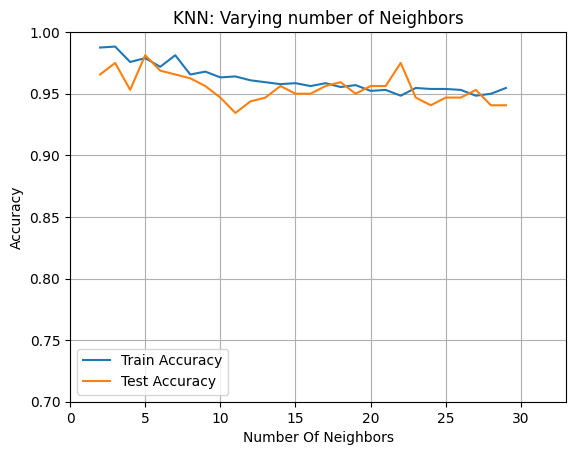

In [50]:
# Cross validate
all_metrics = []

outerIndex = 1
train_score = {}
test_score = {}

n_neighbors = np.arange(2, 30, 1)
for i in n_neighbors:
    outerIndex += 1

    x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size = 0.2, stratify = wine_y)
    
    model = KNeighborsClassifier(n_neighbors = i)

    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    all_metrics.append(metrics)
    print(f"\n- Metrics for {i} neighbors in KNN:")
    print(report)

    train_score[i] = model.score(x_train, y_train)
    test_score[i] = model.score(x_test, y_test)

    print

print("\nAverage metrics:")
print_avg_metrics(all_metrics)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.70, 1.00)
plt.grid()
plt.show()
    

In [52]:
# Finding the best parameters

for key, value in test_score.items():
    if value == max(test_score.values()):
        print(f"Best parameter for KNN based on accuracy: amount of neighbors {key}")

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
parameter = {'n_neighbors':np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(x_train, y_train)
print(f"Best parameter is: {knn_cv.best_params_}")

Best parameter for KNN based on accuracy: amount of neighbors 5
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameter is: {'n_neighbors': 3}


# Heart Disease Dataset

In [53]:
# Preprocess dataset
heartDF = pd.read_csv("./data/heart_statlog_cleveland_hungary_final.csv")

heartDF['target'] = heartDF['target'].apply(lambda x: 'heart disease' if x else 'normal')
heart_y = heartDF['target'].values
heart_x = heartDF.drop('target', axis=1).values

In [54]:
# Standardize dataset
scaler = StandardScaler()
heart_x = scaler.fit_transform(heart_x)


- Metrics for 2 neighbors in KNN:
               precision    recall  f1-score   support

heart disease       0.84      0.93      0.88       126
       normal       0.91      0.79      0.85       112

     accuracy                           0.87       238
    macro avg       0.87      0.86      0.86       238
 weighted avg       0.87      0.87      0.86       238


- Metrics for 3 neighbors in KNN:
               precision    recall  f1-score   support

heart disease       0.82      0.82      0.82       126
       normal       0.79      0.79      0.79       112

     accuracy                           0.81       238
    macro avg       0.81      0.81      0.81       238
 weighted avg       0.81      0.81      0.81       238


- Metrics for 4 neighbors in KNN:
               precision    recall  f1-score   support

heart disease       0.76      0.92      0.83       126
       normal       0.88      0.68      0.77       112

     accuracy                           0.81       238
    mac

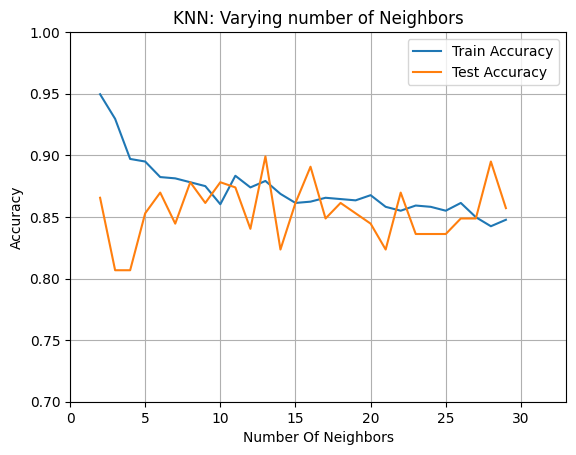

In [55]:
# Cross validate
all_metrics = []

outerIndex = 1
train_score = {}
test_score = {}

n_neighbors = np.arange(2, 30, 1)
for i in n_neighbors:
    outerIndex += 1

    x_train, x_test, y_train, y_test = train_test_split(heart_x, heart_y, test_size = 0.2, stratify = heart_y)
    
    model = KNeighborsClassifier(n_neighbors = i)

    metrics, report, cm = fit_and_predict(model, x_train, x_test, y_train, y_test)
    all_metrics.append(metrics)
    print(f"\n- Metrics for {i} neighbors in KNN:")
    print(report)

    train_score[i] = model.score(x_train, y_train)
    test_score[i] = model.score(x_test, y_test)

    print

print("\nAverage metrics:")
print_avg_metrics(all_metrics)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.70, 1.00)
plt.grid()
plt.show()

In [56]:
for key, value in test_score.items():
    if value == max(test_score.values()):
        print(f"Best parameter for KNN based on accuracy: amount of neighbors {key}")

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
parameter = {'n_neighbors':np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(x_train, y_train)
print(f"Best parameter is: {knn_cv.best_params_}")

Best parameter for KNN based on accuracy: amount of neighbors 13
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameter is: {'n_neighbors': 12}
